In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
dimensions_list = ['grade','race','sex']
num_dimensions = len(dimensions_list)
sex_list = ["Female","Male"]
race_list = ["White","Black","Hispanic","Asian","Mixed/other"]
grade_list = ["7th","8th","9th","10th","11th","12th"]
all_attributes_dict = {
    "grade":grade_list,
    "race":race_list,
    "sex":sex_list
}

multidim_groups = list(itertools.product(*[all_attributes_dict[d] for d in dimensions_list]))

results_df = pd.read_csv("preference_results_v4_merged.csv")

# Fig S2a

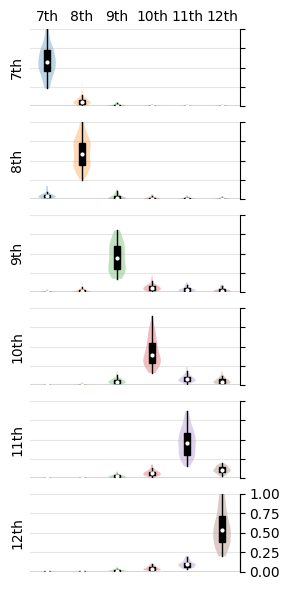

In [3]:
## Unnormalized version for SI
mediansize = 2
plt.close("all")

## Grade
fig, axs = plt.subplots(len(grade_list),1,figsize=(3,6),sharey=False,sharex=False)

for i, gi in enumerate(grade_list):
    ax = axs[i]
    ax.grid(axis = "y",zorder=0,alpha=0.3)
    plt.sca(ax)
    plt.xlim(-0.5,len(grade_list)-0.5)
    plt.ylim(0,)
    plt.axhline(0,color="grey",alpha=0.3)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
        # plt.setp(ax.get_xticklabels(), visible=False) 
    ax.tick_params(axis='x', which='both', length=0)
    ax.spines[["bottom",'left', 'top']].set_visible(False)
    # if i < len(grade_list)-1:
    #     ax.spines[["bottom",'left', 'top']].set_visible(False)
    # else:
    #     plt.xticks(range(len(grade_list)),grade_list)
    #     ax.spines[['bottom','left', 'top']].set_visible(False)
    plt.ylabel(gi)
    for j, gj in enumerate(grade_list):
        col = "h_and_1d-simple_grade_" + gi + "-" + gj
        vals = results_df[col].values[~np.isnan(results_df[col])]
        # print (results_df[col][68])
        p = plt.violinplot(vals,positions=[j],showmeans=False, showmedians=False, showextrema=False, vert=True)
        p["bodies"][0].set_facecolor(f"C{j}")
        plt.boxplot(vals,positions=[j],
                    # notch=True,bootstrap=10000,
                    sym = "", ## do not plot outliers,
                    patch_artist=True,
                    boxprops=dict(facecolor='black'),
                    medianprops=dict(alpha=0),
                    capprops=dict(alpha=0)
                   )
        plt.plot(j,np.median(vals),"ow",ms=mediansize)
    xtcks = axs[i].get_xticks()
    if i == len(grade_list)-1:
        plt.yticks([0,0.25,0.5,0.75,1])
    else:
        plt.yticks([0,0.25,0.5,0.75,1],[])
    if i != 0:
        plt.xticks(xtcks,[""]*len(xtcks))

axs[0].set_xticks(range(len(grade_list)),grade_list)

ax2 = axs[-1].twinx()
# ax2.set_ylabel("Normalized\npreference ($h_{r,s}/h_{r,r}$)",labelpad=35)
ax2.spines[["bottom",'left', 'top']].set_visible(False)
axs[-1].yaxis.tick_right()
ax2.yaxis.tick_right()
ax2.set_yticks([],[])

# plt.sca(axs[0])
# axs[0].set_xticks(range(len(grade_list)),grade_list)
# axs[0].xaxis.tick_top()

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

# fig.text(0.95, 0.35, "Normalized\npreference", ha='center', va='bottom', rotation="vertical")
# fig.text(0.95, 0.7, "($h_{r,s}/h_{r,r}$)", ha='center', va='top', rotation="vertical")

plt.show()

# Fig S2b

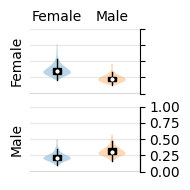

In [4]:
## Unnormalized
mediansize = 2
plt.close("all")

## Grade
fig, axs = plt.subplots(len(sex_list),1,figsize=(2,2),sharey=False,sharex=False)

for i, gi in enumerate(sex_list):
    ax = axs[i]
    ax.grid(axis = "y",zorder=0,alpha=0.3)
    plt.sca(ax)
    plt.xlim(-0.5,len(sex_list)-0.5)
    plt.ylim(0.0,1.0)
    plt.axhline(0,color="grey",alpha=0.3)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
        # plt.setp(ax.get_xticklabels(), visible=False) 
    ax.tick_params(axis='x', which='both', length=0)
    ax.spines[["bottom",'left', 'top']].set_visible(False)
    # if i < len(sex_list)-1:
    #     ax.spines[["bottom",'left', 'top']].set_visible(False)
    # else:
    #     plt.xticks(range(len(sex_list)),sex_list)
    #     ax.spines[['bottom','left', 'top']].set_visible(False)
    plt.ylabel(gi)
    for j, gj in enumerate(sex_list):
        # if gi == gj:
            # continue
        col = "h_and_1d-simple_sex_" + gi + "-" + gj
        vals = results_df[col].values[~np.isnan(results_df[col])]
        p = plt.violinplot(vals,positions=[j],showmeans=False, showmedians=False, showextrema=False, vert=True)
        p["bodies"][0].set_facecolor(f"C{j}")
        plt.boxplot(vals,positions=[j],
                    # notch=True,bootstrap=10000,
                    sym = "", ## do not plot outliers,
                    patch_artist=True,
                    boxprops=dict(facecolor='black'),
                    medianprops=dict(alpha=0),
                    capprops=dict(alpha=0)
                   )
        plt.plot(j,np.median(vals),"ow",ms=mediansize)
    xtcks = axs[i].get_xticks()
    if i == len(sex_list)-1:
        plt.yticks([0,0.25,0.5,0.75,1])
    else:
        plt.yticks([0,0.25,0.5,0.75,1],[])
    if i != 0:
        plt.xticks(xtcks,[""]*len(xtcks))

axs[0].set_xticks(range(len(sex_list)),sex_list)

ax2 = axs[-1].twinx()
# ax2.set_ylabel("Normalized\npreference ($h_{r,s}/h_{r,r}$)",labelpad=35)
ax2.spines[["bottom",'left', 'top']].set_visible(False)
axs[-1].yaxis.tick_right()
ax2.yaxis.tick_right()
ax2.set_yticks([],[])

# plt.sca(axs[0])
# axs[0].set_xticks(range(len(sex_list)),sex_list)
# axs[0].xaxis.tick_top()

# fig.text(1, 0.35, "Normalized\npreference", ha='right', va='bottom', rotation="vertical")
# fig.text(1, 0.7, "($h_{r,s}/h_{r,r}$)", ha='right', va='top', rotation="vertical")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

plt.show()

# Fig S2c

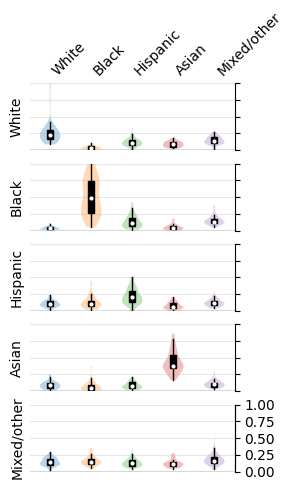

In [5]:
## Unnormalized version for SI
mediansize = 2
plt.close("all")

## Grade
fig, axs = plt.subplots(len(race_list),1,figsize=(3,5),sharey=False,sharex=False)

pref_means = {gi:[] for gi in race_list}
for i, gi in enumerate(race_list):
    ax = axs[i]
    ax.grid(axis = "y",zorder=0,alpha=0.3)
    plt.sca(ax)
    plt.xlim(-0.5,len(race_list)-0.5)
    plt.ylim(0,1)
    plt.axhline(0,color="grey",alpha=0.3)
    ax.yaxis.tick_right()
    ax.xaxis.tick_top()
        # plt.setp(ax.get_xticklabels(), visible=False) 
    ax.tick_params(axis='x', which='both', length=0)
    ax.spines[["bottom",'left', 'top']].set_visible(False)
    # if i < len(race_list)-1:
    #     ax.spines[["bottom",'left', 'top']].set_visible(False)
    # else:
    #     plt.xticks(range(len(race_list)),race_list)
    #     ax.spines[['bottom','left', 'top']].set_visible(False)
    plt.ylabel(gi)
    for j, gj in enumerate(race_list):
        # if gi == gj:
        #     pref_means[gj].append(1)
        #     continue
        if gi == gj:
            pref_means[gj].append(1)
        col = "h_and_1d-simple_race_" + gi + "-" + gj
        vals = results_df[col].values[~np.isnan(results_df[col])]
        p = plt.violinplot(vals,positions=[j],showmeans=False, showmedians=False, showextrema=False, vert=True)
        p["bodies"][0].set_facecolor(f"C{j}")
        plt.boxplot(vals,positions=[j],
                    # notch=True,bootstrap=10000,
                    sym = "", ## do not plot outliers,
                    patch_artist=True,
                    boxprops=dict(facecolor='black'),
                    medianprops=dict(alpha=0),
                    capprops=dict(alpha=0)
                   )
        plt.plot(j,np.median(vals),"ow",ms=mediansize)
    
    xtcks = axs[i].get_xticks()
    if i == len(race_list)-1:
        plt.yticks([0,0.25,0.5,0.75,1])
    else:
        plt.yticks([0,0.25,0.5,0.75,1],[])
    if i != 0:
        plt.xticks(xtcks,[""]*len(xtcks))

axs[0].set_xticks(range(len(race_list)),race_list,rotation=45,ha="left")

ax2 = axs[-1].twinx()
# ax2.set_ylabel("Normalized\npreference ($h_{r,s}/h_{r,r}$)",labelpad=35)
ax2.spines[["bottom",'left', 'top']].set_visible(False)
axs[-1].yaxis.tick_right()
ax2.yaxis.tick_right()
ax2.set_yticks([],[])

# plt.sca(axs[0])
# axs[0].set_xticks(range(len(race_list)),race_list)
# axs[0].xaxis.tick_top()

# fig.text(1, 0.35, "Normalized\npreference", ha='right', va='bottom', rotation="vertical")
# fig.text(1, 0.7, "($h_{r,s}/h_{r,r}$)", ha='right', va='top', rotation="vertical")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

plt.show()